# Module 8 - Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview the story you hope to uncover.

In [1]:
install.packages('Lahman')

library(Lahman)
library(dplyr)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [72]:
names(Batting)
peopleInfo <- People %>%
    select(playerID, birthYear, birthMonth, nameLast, nameFirst)

batting <- battingStats() %>%
        left_join(peopleInfo, by = "playerID") %>%
        mutate(age = yearID - birthYear - 1L *(birthMonth >= 10)) %>%
        arrange(playerID, yearID, stint)

bat2 <- batting %>% group_by(playerID) %>% filter(max(yearID) <= 2020, PA >= 250, mean(HR) > 5) %>% 
    mutate(Total_HR = sum(HR), startAge = min(age), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR) %>%
    select(playerID, G, AB, R, H, X2B, X3B, HR, RBI, SB, BB, BA, PA, TB, SlugPct, OBP, OPS, BABIP, age, Total_HR, startAge, currentAge, playTime, HRper, potentialby42)

bat3 <- na.omit(bat2)
sapply(bat3, function(x) sum(is.na(x)))

[1] "playerID" "yearID"   "stint"    "teamID"   "lgID"     "G"       
 [7] "AB"       "R"        "H"        "X2B"      "X3B"      "HR"      
[13] "RBI"      "SB"       "CS"       "BB"       "SO"       "IBB"     
[19] "HBP"      "SH"       "SF"       "GIDP"

playerID             G            AB             R             H 
            0             0             0             0             0 
          X2B           X3B            HR           RBI            SB 
            0             0             0             0             0 
           BB            BA            PA            TB       SlugPct 
            0             0             0             0             0 
          OBP           OPS         BABIP           age      Total_HR 
            0             0             0             0             0 
     startAge    currentAge      playTime         HRper potentialby42 
            0             0             0             0             0

In [3]:
#bat1 <- batting %>% group_by(playerID) %>% filter(max(yearID) == 2021) %>% 
    #summarize(Total_HR = sum(HR), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR) 

#bat1 %>% 
    #arrange(-potentialby42) 


Regression tree:
tree(formula = frmla, data = bat2)
Variables actually used in tree construction:
[1] "HRper"    "playTime"
Number of terminal nodes:  9 
Residual mean deviance:  1708 = 29310000 / 17160 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-255.700  -22.090   -3.255    0.000   20.290  205.800 

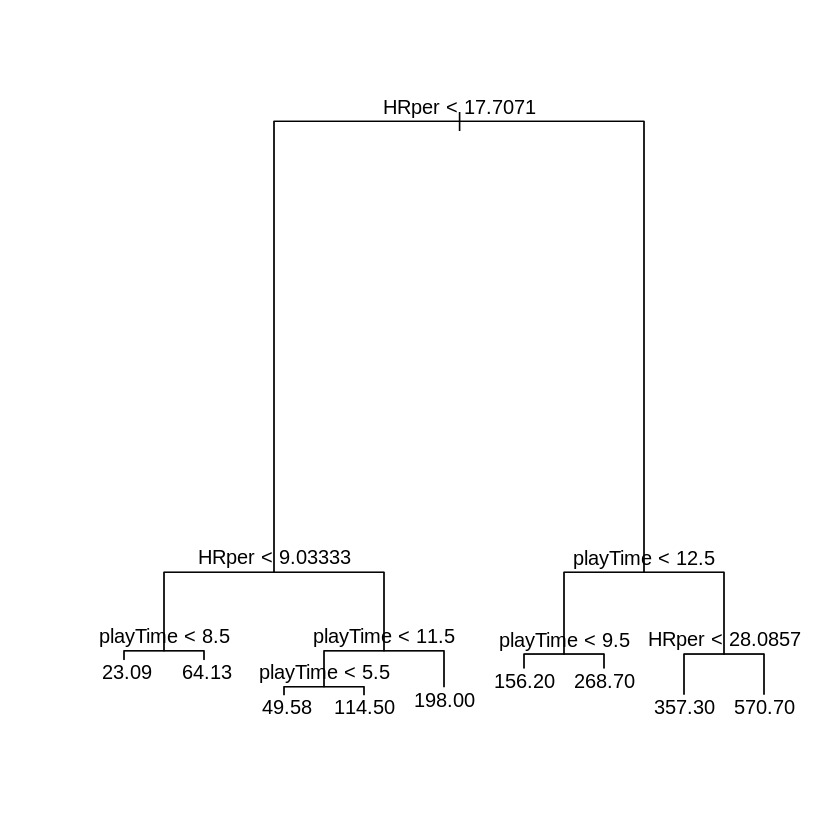

In [4]:
library(tree)
frmla <- Total_HR ~ G + AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + IBB + HBP + SH + SF + GIDP + BA + PA + TB + SlugPct + OBP + OPS + BABIP + age + startAge + currentAge + playTime + HRper
tr <- tree(frmla, data = bat2)
summary(tr)
plot(tr)
text(tr)

In [55]:
library(e1071)

set.seed(123)

train_ind <- sample(seq_len(nrow(bat2)), size = nrow(bat2)*.7)
#bat2[train_ind,]
train <- bat2[train_ind,]
test <- bat2[-train_ind,]

m<- naiveBayes(frmla, data = train)
m

ERROR: Error in eval(predvars, data, env): object 'CS' not found


In [6]:
library(tidyr)
bat3 <- bat2 %>% select(playerID, G, AB, R, H, X2B, X3B, HR, RBI, SB, BB, BA, PA, TB, SlugPct, OBP, OPS, BABIP, age, Total_HR, startAge, currentAge, playTime, HRper, potentialby42)
sapply(bat3, function(x) sum(is.na(x)))

nums<-sapply(bat3, is.numeric)
print(cor(bat3[ , nums], use = "na.or.complete"))
#nums <- sapply(bat3, as.numeric)
#cor(bat3[ , nums])


playerID             G            AB             R             H 
            0             0             0             0             0 
          X2B           X3B            HR           RBI            SB 
            0             0             0           193           960 
           BB            BA            PA            TB       SlugPct 
            0             0             0             0             0 
          OBP           OPS         BABIP           age      Total_HR 
            0             0             0            75             0 
     startAge    currentAge      playTime         HRper potentialby42 
           75            75             0             0            75

                        G          AB           R           H         X2B
G              1.00000000  0.91976749  0.73206234  0.84937840  0.70253941
AB             0.91976749  1.00000000  0.83951108  0.95117565  0.76827390
R              0.73206234  0.83951108  1.00000000  0.88744917  0.74070461
H              0.84937840  0.95117565  0.88744917  1.00000000  0.81928084
X2B            0.70253941  0.76827390  0.74070461  0.81928084  1.00000000
X3B            0.35176051  0.45418337  0.51885169  0.51332432  0.31697192
HR             0.45762355  0.44172711  0.51502107  0.44570966  0.49794050
RBI            0.68289677  0.73913965  0.76478430  0.78629554  0.74292278
SB             0.28268097  0.37584202  0.48716997  0.38408254  0.19042399
BB             0.61719355  0.58853013  0.69669184  0.57886706  0.51496467
BA             0.27730214  0.37996714  0.55975586  0.62871272  0.53613003
PA             0.92557233  0.99224254  0.86165959  0.94626655  0.76908286
TB             0.82003076  0.89505010 


Regression tree:
tree(formula = frmla2, data = bat2)
Variables actually used in tree construction:
[1] "HR"       "playTime" "startAge"
Number of terminal nodes:  8 
Residual mean deviance:  9155 = 157100000 / 17160 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-341.00  -57.87  -17.86    0.00   47.27  542.80 

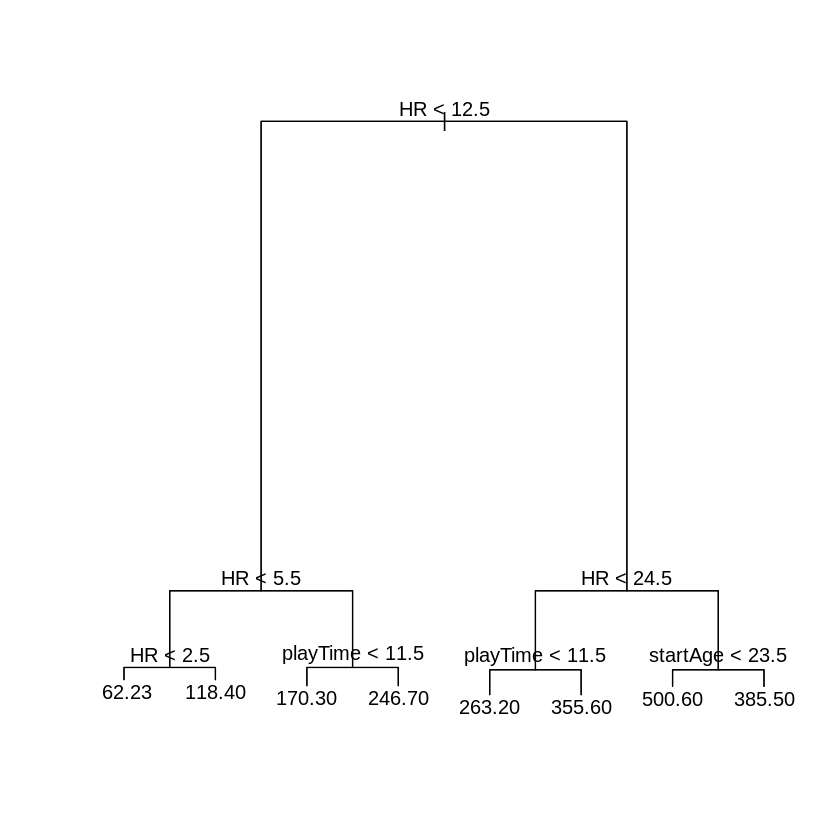

In [7]:
frmla2 <- potentialby42 ~ G + AB + R + H + X2B + X3B + HR + RBI + SB + CS + BB + IBB + HBP + SH + SF + GIDP + BA + PA + TB + SlugPct + OBP + OPS + BABIP + age + startAge + currentAge + playTime
#HR + RBI + TB + SlugPct + OPS + currentAge + playTime + HRper
tr2 <- tree(frmla2, data = bat2)
summary(tr2)
plot(tr2)
text(tr2)

In [73]:
library(caret)
prunefrmla2 <- potentialby42 ~ HR + startAge + playTime

train_ind <- sample(seq_len(nrow(bat3)), size = nrow(bat2)*.7)
#bat2[train_ind,]
train2 <- bat3[train_ind,]
test2 <- bat3[-train_ind,]

In [74]:
m4 <- train(prunefrmla2, train2, method = 'lm')
summary(m4)
m5 <- train(prunefrmla2, test2, method = 'lm')
summary(m5)

coef(m4$finalModel)




Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-336.22  -63.77  -10.33   52.16  541.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 423.3017    14.5617   29.07   <2e-16 ***
HR            9.3856     0.1061   88.45   <2e-16 ***
startAge    -13.4992     0.5343  -25.26   <2e-16 ***
playTime      4.0741     0.2786   14.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.13 on 8833 degrees of freedom
Multiple R-squared:  0.5497,	Adjusted R-squared:  0.5496 
F-statistic:  3595 on 3 and 8833 DF,  p-value: < 2.2e-16



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-271.22  -62.39  -10.60   51.92  519.18 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 441.4837    22.7941  19.368   <2e-16 ***
HR            9.2884     0.1595  58.219   <2e-16 ***
startAge    -14.1217     0.8373 -16.866   <2e-16 ***
playTime      3.7484     0.4191   8.944   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.57 on 3755 degrees of freedom
Multiple R-squared:  0.5606,	Adjusted R-squared:  0.5603 
F-statistic:  1597 on 3 and 3755 DF,  p-value: < 2.2e-16


(Intercept)          HR    startAge    playTime 
 423.301655    9.385559  -13.499176    4.074111


Regression tree:
tree(formula = prunefrmla2, data = bat3)
Number of terminal nodes:  8 
Residual mean deviance:  9983 = 125700000 / 12590 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-366.30  -67.46  -15.28    0.00   55.26  548.90 

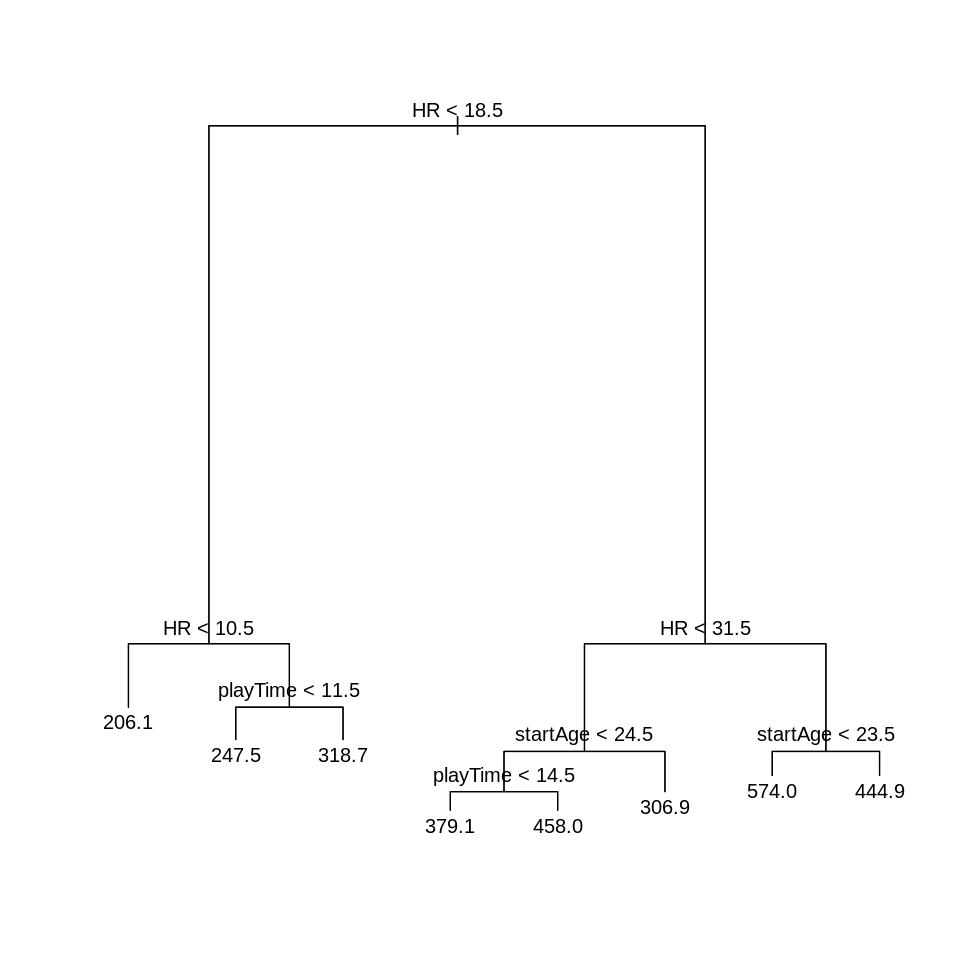

In [75]:
bat3 <- na.omit(bat2)


tr3 <- tree(prunefrmla2, data = bat3)
summary(tr3)
plot(tr3)
text(tr3)

In [76]:
coef.icept <- coef(m5$finalModel)[1]
coef.slope <- coef(m5$finalModel)[2]
class_coefs <- coef(m5$finalModel)[3]
bat3$pred <- predict(m4, bat3, na.action = na.omit)
bat3$testpred<-predict(m5, newdata=bat3, na.action = na.omit)

bat3

playerID,G,AB,R,H,X2B,X3B,HR,RBI,SB,⋯,BABIP,age,Total_HR,startAge,currentAge,playTime,HRper,potentialby42,pred,testpred
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
aaronha01,122,468,58,131,27,6,13,69,2,⋯,0.281,20,755,20,42,22,32.82609,755.0000,364.9608,362.2652
aaronha01,153,602,105,189,37,9,27,106,3,⋯,0.313,21,755,20,42,22,32.82609,755.0000,496.3587,492.3031
aaronha01,153,609,106,200,34,14,26,92,2,⋯,0.325,22,755,20,42,22,32.82609,755.0000,486.9731,483.0147
aaronha01,151,615,118,198,27,6,44,132,1,⋯,0.298,23,755,20,42,22,32.82609,755.0000,655.9132,650.2064
aaronha01,153,601,109,196,34,4,30,95,4,⋯,0.316,24,755,20,42,22,32.82609,755.0000,524.5153,520.1684
aaronha01,154,629,116,223,46,7,39,123,8,⋯,0.338,25,755,20,42,22,32.82609,755.0000,608.9854,603.7642
aaronha01,153,590,102,172,20,11,40,126,16,⋯,0.265,26,755,20,42,22,32.82609,755.0000,618.3709,613.0527
aaronha01,155,603,115,197,39,10,34,120,21,⋯,0.317,27,755,20,42,22,32.82609,755.0000,562.0576,557.3221
aaronha01,156,592,127,191,28,6,45,128,15,⋯,0.304,28,755,20,42,22,32.82609,755.0000,665.2987,659.4948


In [81]:
bat3 %>% group_by(playerID) %>% summarize(potentialHR = mean(pred)) %>% arrange(-potentialHR)

playerID,potentialHR
<chr>,<dbl>
rodrial01,569.1855
ruthba01,563.9185
mcgwima01,558.2759
foxxji01,552.2065
mayswi01,551.9334
aaronha01,551.0397
bondsba01,550.2032
griffke02,547.6495
sosasa01,543.0943


In [8]:
library(ggplot2)

bat3 <- batting %>% group_by(playerID) %>% filter(max(yearID) == 2021) %>% 
    mutate(Total_HR = sum(HR), currentAge = max(age), playTime = max(yearID) - min(yearID), HRper = mean(HR), potentialby42 = ((42 - currentAge) * HRper) + Total_HR)


bat4 <- bat3 %>% filter(potentialby42 > 600) %>% mutate(Cum_HR = cumsum(HR))
bat4 %>% arrange(-potentialby42)



playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,birthMonth,nameLast,nameFirst,age,Total_HR,currentAge,playTime,HRper,potentialby42,Cum_HR
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
pujolal01,2001,1,SLN,NL,161,590,112,194,47,⋯,1,Pujols,Albert,21,679,41,20,30.86364,709.8636,37
pujolal01,2002,1,SLN,NL,157,590,118,185,40,⋯,1,Pujols,Albert,22,679,41,20,30.86364,709.8636,71
pujolal01,2003,1,SLN,NL,157,591,137,212,51,⋯,1,Pujols,Albert,23,679,41,20,30.86364,709.8636,114
pujolal01,2004,1,SLN,NL,154,592,133,196,51,⋯,1,Pujols,Albert,24,679,41,20,30.86364,709.8636,160
pujolal01,2005,1,SLN,NL,161,591,129,195,38,⋯,1,Pujols,Albert,25,679,41,20,30.86364,709.8636,201
pujolal01,2006,1,SLN,NL,143,535,119,177,33,⋯,1,Pujols,Albert,26,679,41,20,30.86364,709.8636,250
pujolal01,2007,1,SLN,NL,158,565,99,185,38,⋯,1,Pujols,Albert,27,679,41,20,30.86364,709.8636,282
pujolal01,2008,1,SLN,NL,148,524,100,187,44,⋯,1,Pujols,Albert,28,679,41,20,30.86364,709.8636,319
pujolal01,2009,1,SLN,NL,160,568,124,186,45,⋯,1,Pujols,Albert,29,679,41,20,30.86364,709.8636,366


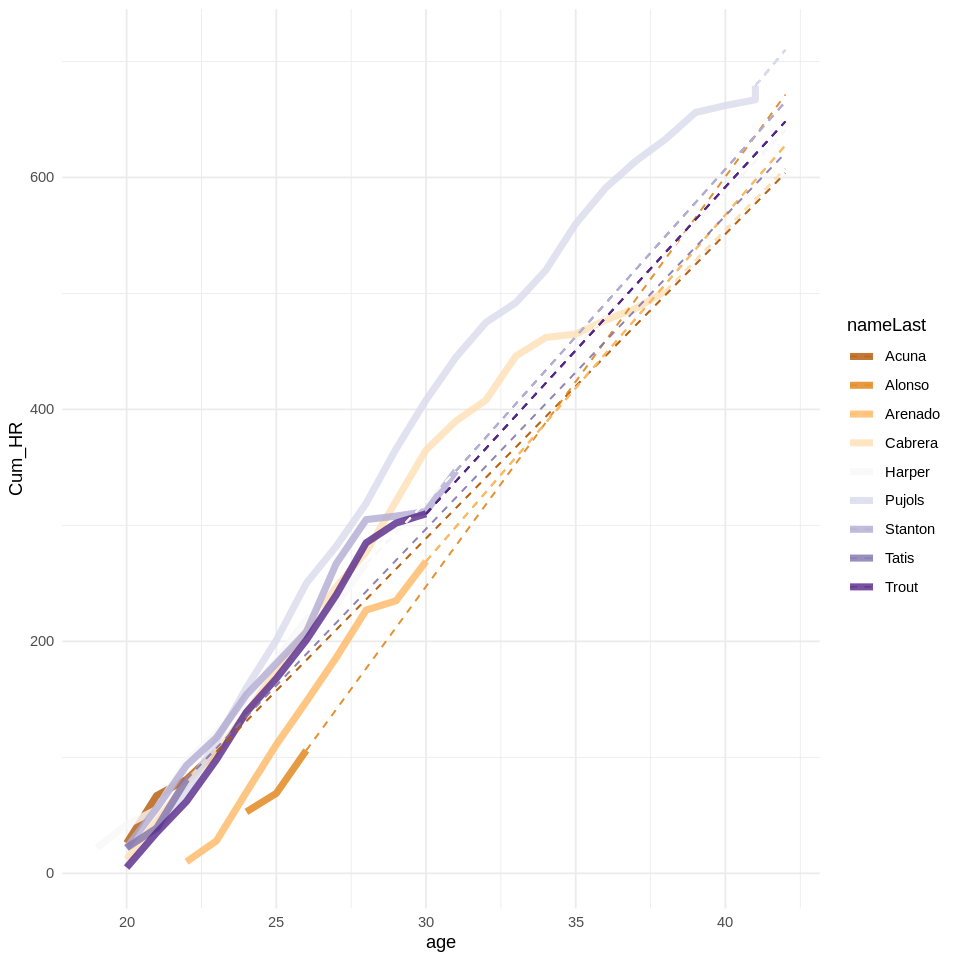

In [9]:
library(RColorBrewer)
#display.brewer.all(n = 9, type = "div", colorblindFriendly = TRUE)
options(repr.plot.width=8, repr.plot.height=8)

g <- bat4 %>% ggplot(aes(age, Cum_HR, color = nameLast)) + geom_line(size = 2, alpha = .8)
g + geom_segment(aes(x = currentAge, y = Total_HR, xend = 42, yend = potentialby42), alpha = .5, linetype = 'dashed') +
    scale_colour_brewer(palette = 'PuOr') + theme_minimal()



In [10]:
bat5 <- bat3 %>% filter(potentialby42 > 600) %>% mutate(Cum_HR = cumsum(HR))
bat5 %>% arrange(-potentialby42) 



playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,birthMonth,nameLast,nameFirst,age,Total_HR,currentAge,playTime,HRper,potentialby42,Cum_HR
<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
pujolal01,2001,1,SLN,NL,161,590,112,194,47,⋯,1,Pujols,Albert,21,679,41,20,30.86364,709.8636,37
pujolal01,2002,1,SLN,NL,157,590,118,185,40,⋯,1,Pujols,Albert,22,679,41,20,30.86364,709.8636,71
pujolal01,2003,1,SLN,NL,157,591,137,212,51,⋯,1,Pujols,Albert,23,679,41,20,30.86364,709.8636,114
pujolal01,2004,1,SLN,NL,154,592,133,196,51,⋯,1,Pujols,Albert,24,679,41,20,30.86364,709.8636,160
pujolal01,2005,1,SLN,NL,161,591,129,195,38,⋯,1,Pujols,Albert,25,679,41,20,30.86364,709.8636,201
pujolal01,2006,1,SLN,NL,143,535,119,177,33,⋯,1,Pujols,Albert,26,679,41,20,30.86364,709.8636,250
pujolal01,2007,1,SLN,NL,158,565,99,185,38,⋯,1,Pujols,Albert,27,679,41,20,30.86364,709.8636,282
pujolal01,2008,1,SLN,NL,148,524,100,187,44,⋯,1,Pujols,Albert,28,679,41,20,30.86364,709.8636,319
pujolal01,2009,1,SLN,NL,160,568,124,186,45,⋯,1,Pujols,Albert,29,679,41,20,30.86364,709.8636,366


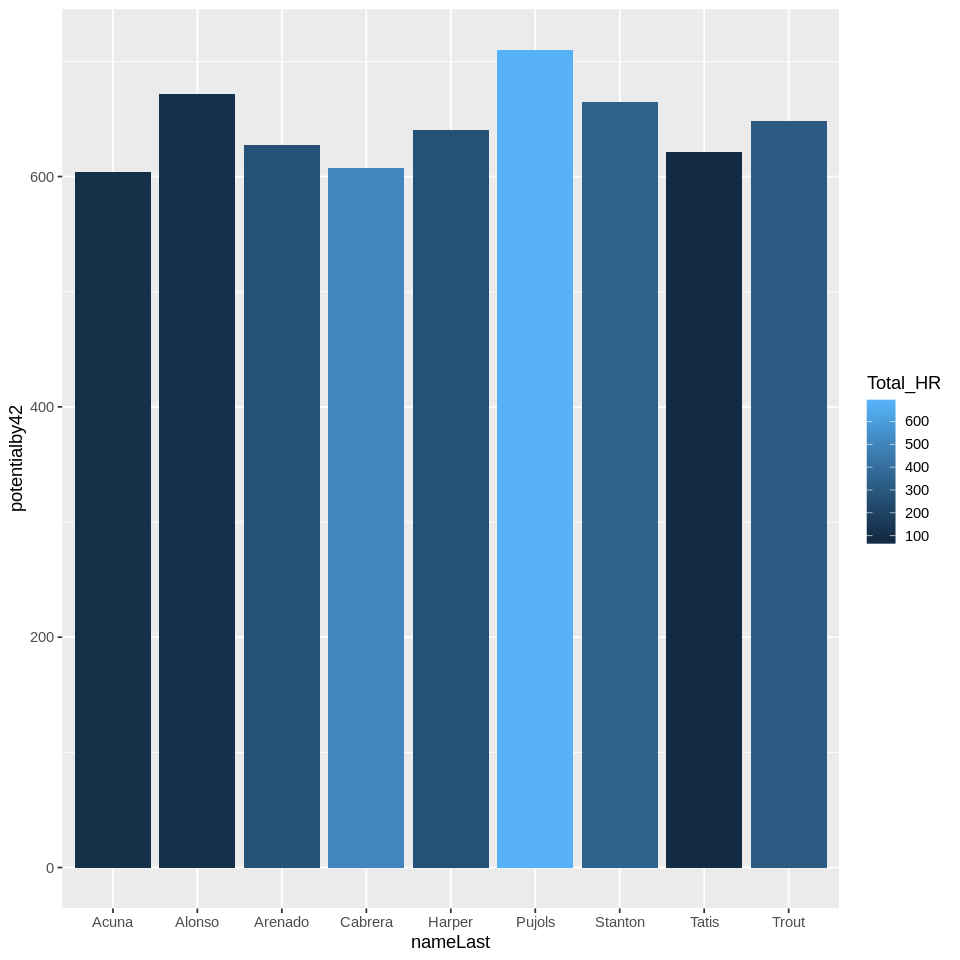

In [11]:
bat4 %>% distinct(playerID, .keep_all = TRUE) %>%
    ggplot(aes(nameLast, potentialby42)) + geom_bar(stat = 'identity', position = 'stack', aes(fill = Total_HR))



In [12]:


#bat3$HR <- ifelse(bat3$yearID == 2020, bat3$HR * 2.7, bat3$HR)

#bat3 %>% filter(yearID == 2020) %>% select(HR)

## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that are now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 5: Filter Results and Build and Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



# Save your notebook, then `File > Close and Halt`